# Model the Wine Quality 

The goal is to model wine quality based on physicochemical tests 

Data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In this problem I will examine the wine quality dataset hosted on the UCI website. This data records 11 chemical properties (such as the concentrations of sugar, citric acid, alcohol, pH etc.) of thousands of red and white wines from northern Portugal, as well as the quality of the wines, recorded on a scale from 1 to 10. In this problem, only red wine quality is modeled. 

This project focusses on following:
- Multiclass converted to binary class problem.
- Handling the unbalanced classes
- F-score scoring metric 
- Calibrating the classifer - when converting prediction probabilities into prediction
- Using seaborn plotting library
- Feature importance


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC,LinearSVC

import seaborn as sns


In [23]:
#wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_df = pd.read_csv('data/winequality-red.csv',sep=';')

In [24]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
wine_df.shape

(1599, 12)

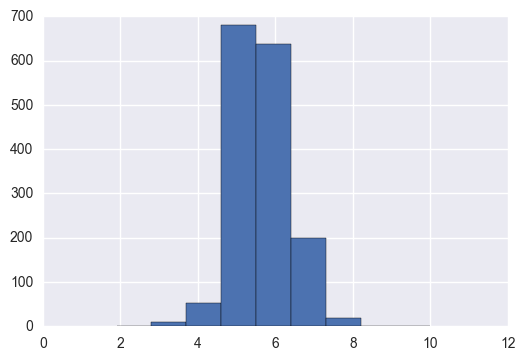

In [38]:
Y= wine_df['quality'].values
plt.hist(Y,range=(1,10))
plt.show()



## Ratings to Binary Classification
Simplify the classification problem into a binary one: good/bad

I am going to change the Y array accordingly such that it only contains zeros (“bad” wines) and ones (“good” wines).

score < 7: bad(0)
score >=7: good(1)

In [39]:
Y=[1 if i >= 7 else 0 for i in Y]


In [40]:
X= wine_df.drop('quality',axis =1)
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


(array([ 1382.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   217.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

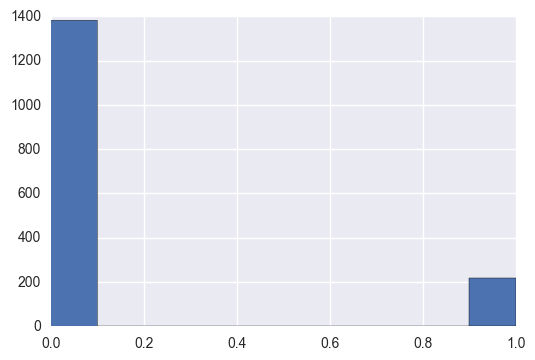

In [41]:
plt.hist(Y)

From the histogram, It can be seen that the classes are unbalanced. Good quaity wines are rare. 

In [43]:
Y = np.asarray(Y)
X = np.asmatrix(X)

### Model - RandomForestClassifier

In [11]:

scores = []
for t in range(1,41):
    clf = RandomForestClassifier(n_estimators= t)
    scores.append(cross_val_score(clf,X,Y,cv=10))
    

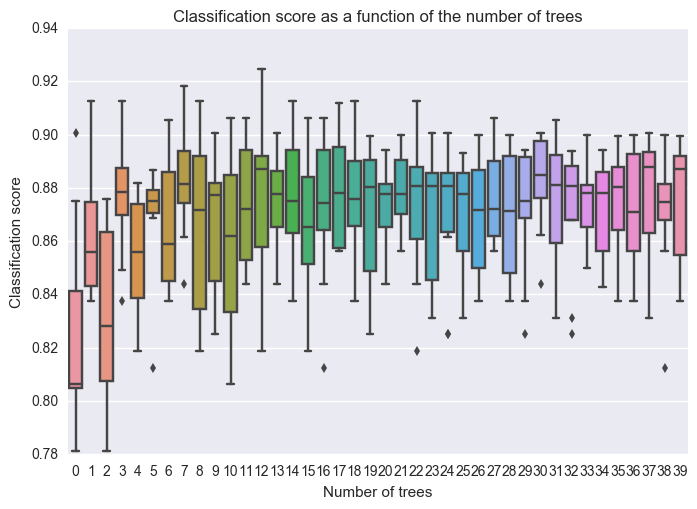

In [12]:
sns.boxplot(data = scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

Accuracy seems to improve with additional trees. The computational cost of fitting additional trees compared to the small accuracy benefit should also be considered

### Evaluating The Unbalanced Classes

In [13]:
per = float(len(Y[Y==0]))/len(Y)
print 'percentage of majority class(bad wine) is {}'.format(per)

per = float(len(Y[Y==1]))/len(Y)
print 'percentage of majority class(good wine) is {}'.format(per)



percentage of majority class(bad wine) is 0.864290181363
percentage of majority class(good wine) is 0.135709818637


We can see that the classes are unbalanced.
Much more 'bad' wines

When there are unbalanced classes in a dataset, guessing the more common class will often yield very high accuracy. The accuracy metric may be misleading in this case.For this reason, we want to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers. F1 metric instead, which is less sensitive to imbalance.F1: Harmonic mean of sensitivity & precision.

The goal is to identify the members of the positive class (the rare class) successfully — this could be either the good wines or the patients presenting a rare disease. For which we wwil consider precision and recall



In [14]:

scores = []
trees= range(1,41)
for t in trees:
    clf = RandomForestClassifier(n_estimators= t)
    scores.append(cross_val_score(clf,X,Y,cv=10,scoring = 'f1'))
    

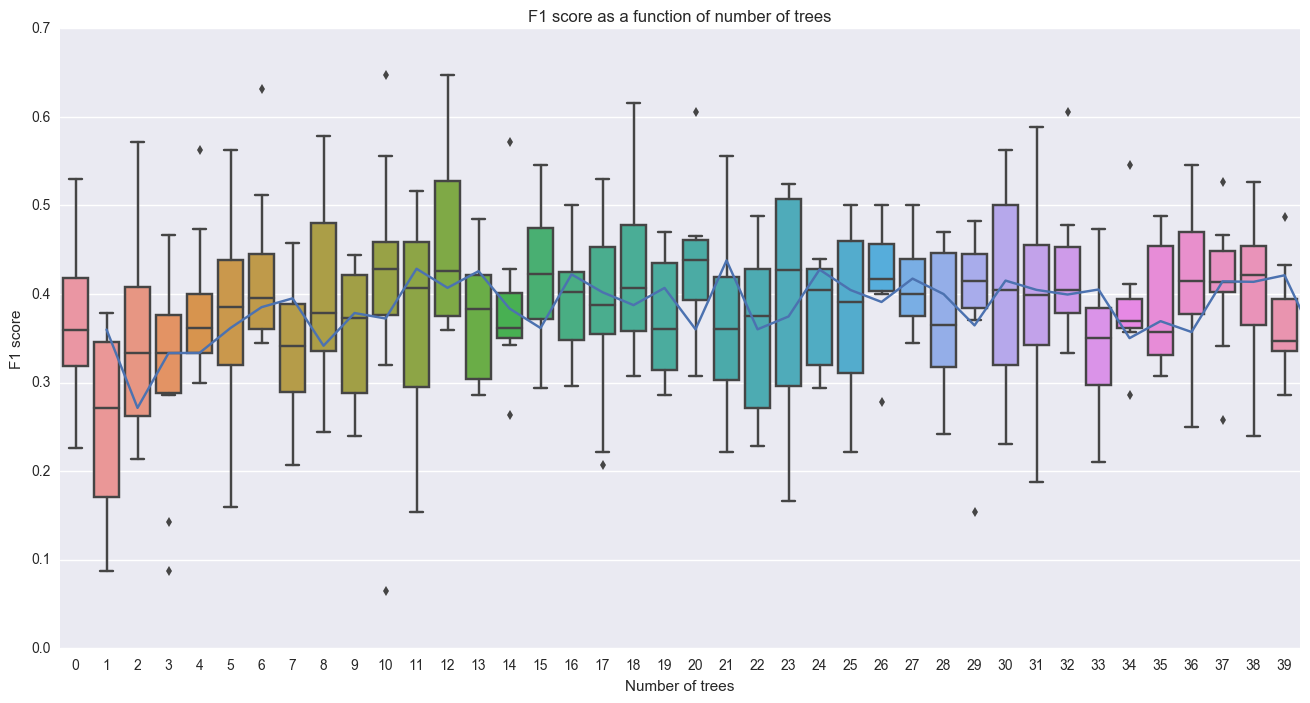

In [15]:

plt.figure(figsize=(16,8))
sns.boxplot(data = scores)

medians = [np.median(score) for score in scores]
plt.plot(trees,medians)
plt.xlabel('Number of trees')
plt.ylabel('F1 score')
plt.title('F1 score as a function of number of trees')

plt.show()



The scores are clustered around the 40% mark. There is only very little gain now by increasing the number of trees. I will use 15 as my number of trees in RF model

In [44]:
clf = RandomForestClassifier(n_estimators = 15)
f1_score = cross_val_score(clf, X, Y, cv=10, scoring='f1')
print(f1_score.mean())


0.401761411591


### Calibrating the classifier
If a classifier’s prediction probabilities are accurate, the appropriate way to convert its probabilities into predictions is to simply choose the class with probability > 0.5. This is the default behavior of classifiers when you call their predict method. When the probabilities are inaccurate, this does not work well, but you can still get good predictions by choosing a more appropriate cutoff. In this section, I will choose a cutoff by cross validation.

Using 10-fold cross validation, I am going to find a cutoff in np.arange(0.1,0.9,0.1) that gives the best average F1 score when converting prediction probabilities from a 15-tree random forest classifier into prediction

In [77]:
def custom_f(cutoff):
    def f1_cutoff(clf,X,Y):
        ypred = clf.predict_proba(X)[:,1]>cutoff
        return sklearn.metrics.f1_score(Y,ypred)
    return f1_cutoff

scores=[]
for cutoff in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators= 15,random_state=1)
    scores.append(cross_val_score(clf,X,Y,cv=10,scoring = custom_f(cutoff)))
medians = [np.median(score) for score in scores]
print medians

[0.43348982785602508, 0.42871621621621625, 0.49561403508771928, 0.45368782161234988, 0.41901776384535006, 0.2943722943722944, 0.19409937888198756, 0.088932806324110672]


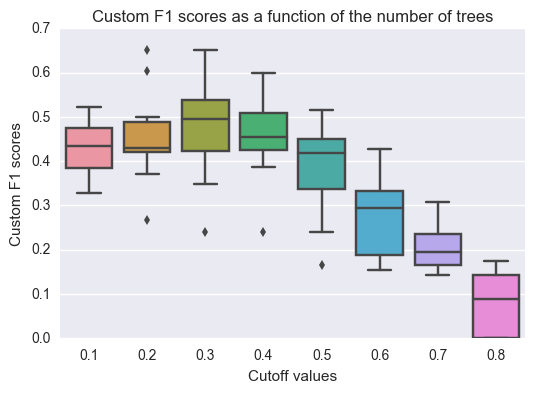

In [78]:
sns.boxplot(x=np.arange(0.1,0.9,0.1), y=scores)
plt.xlabel('Cutoff values')
plt.ylabel('Custom F1 scores')
plt.title('Custom F1 scores as a function of the number of trees')
plt.show()

The best predicting results are obtained with a cutoff of 0.3 and this makes sense because it balance the errors caused by an ubalanced dataset.

A cutoff of about 0.3-0.5 appears to give the best predictive performance. It is intuitive that the cutoff is less than 0.5 because the training data contains many fewer examples of “good” wines, so you need to adjust the classifier’s cutoff to reflect that fact that good wines are, in general, rarer.

In [116]:
clf = RandomForestClassifier(n_estimators= 15,random_state=1)
clf.fit(X,Y)      
imp = clf.feature_importances_
names = wine_df.columns
ind = clf.feature_importances_.argsort()[::-1]


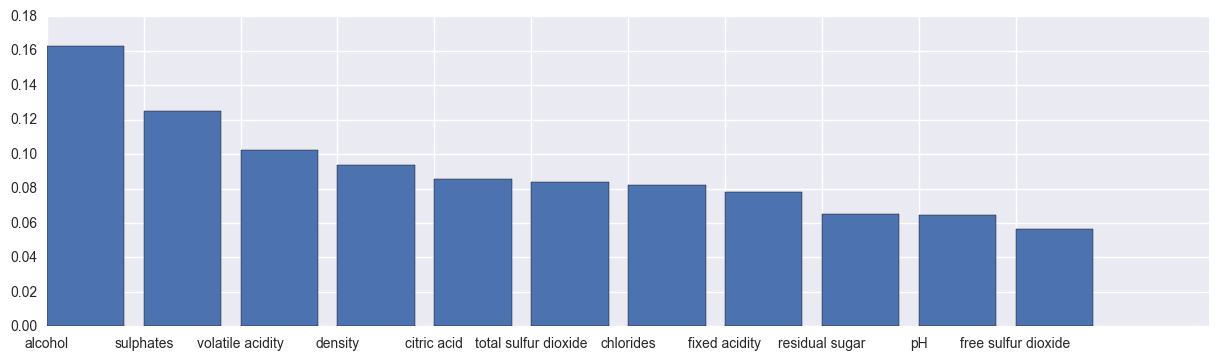

In [120]:
fig,axes = plt.subplots(1,figsize=(15,4))
axes.bar(range(len(imp)),imp[ind])
axes.set_xticks(range(len(ind)))
axes.set_xticklabels(names[ind] )
plt.show()

In [121]:

scores=[]
clf = SVC(C=1,class_weight={1:7},random_state=1)
scores.append(cross_val_score(clf,X,Y,cv=10,scoring = 'f1'))
median = np.median(score)
print median    


0.403716216216


If the class_weight param is high then the minority class gains in importance (its errors are considered more costly than those of the other majority class